# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import altair as alt
from collections import deque
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import time
import sys
import os

# # Add the parent directory to the path manually
# notebook_path = os.path.abspath('.')  # Current directory
# parent_path = os.path.dirname(notebook_path)
# sys.path.append(parent_path)

# Import our custom search helpers
from graph_search import *
from word_ladder import *
from n_puzzle import *
from metrics import *

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# Graph Traversal

## Create Demo Graph

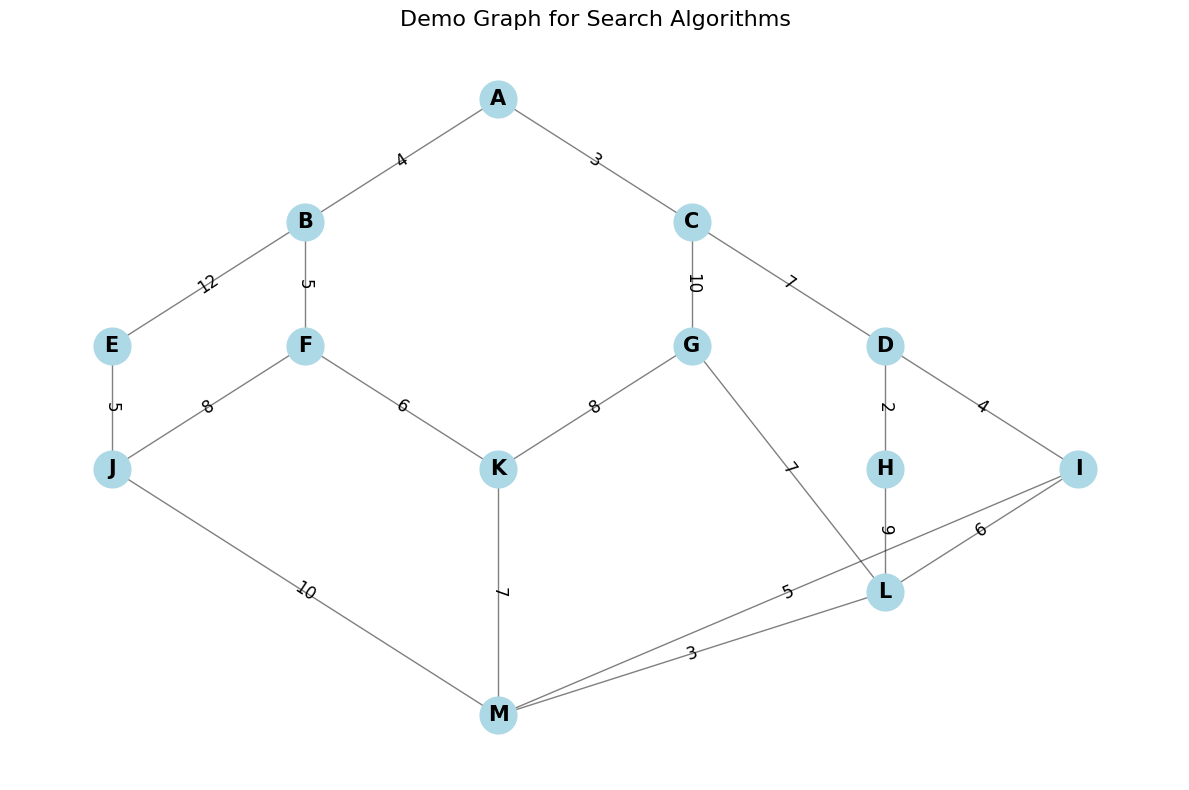

In [2]:
# Create a demo graph
demo_graph = create_demo_graph()

# Visualize the graph
fig = visualize_graph(demo_graph, title="Demo Graph for Search Algorithms")
plt.show()

## Run BFS


Running BFS search from A to M...
✓ Path found! Length: 4, Cost: 31
Path: A -> B -> E -> J -> M
Nodes visited: 13
Max frontier size: 7
Time taken: 0.000072 seconds


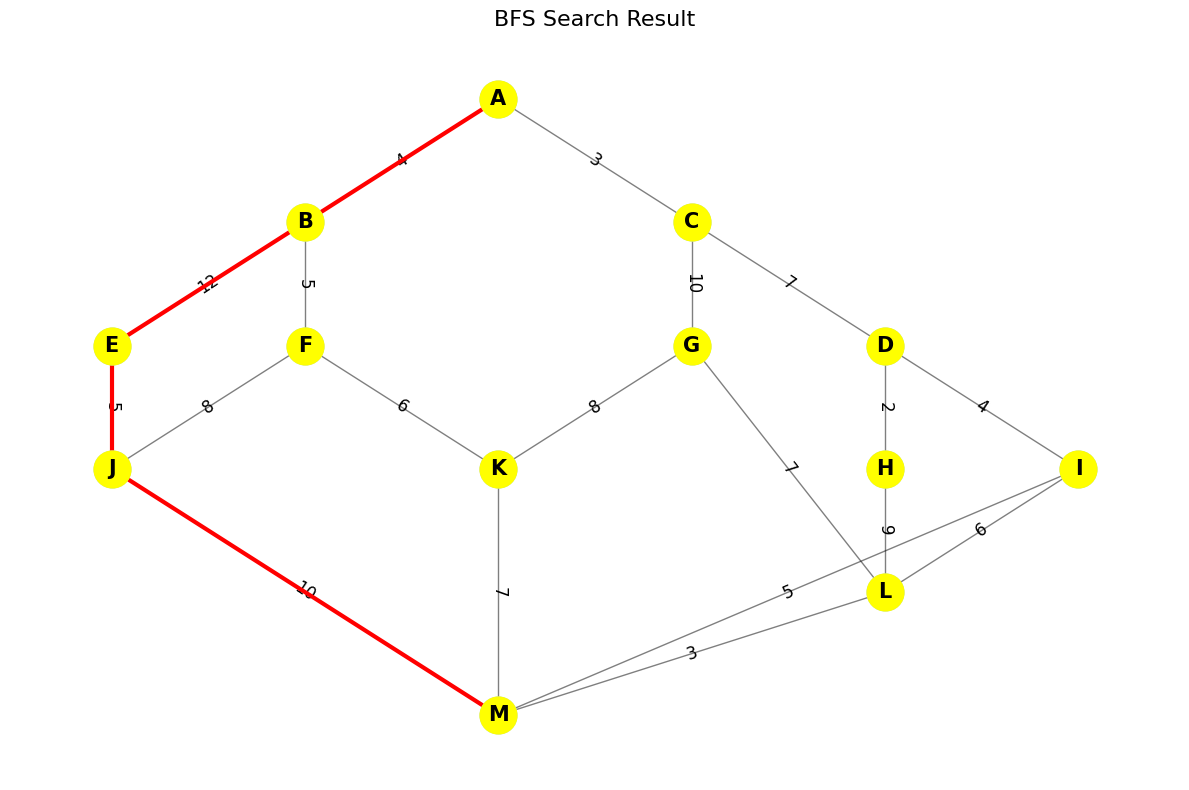

(['A', 'B', 'E', 'J', 'M'],
 ['A', 'B', 'C', 'E', 'F', 'D', 'G', 'J', 'K', 'H', 'I', 'L', 'M'],
 {'time': 7.200241088867188e-05,
  'space': 7,
  'path_cost': 31,
  'nodes_visited': 13})

In [3]:
run_graph_search_example(demo_graph, 'bfs', 'A', 'M')


Running DFS search from A to M...
✓ Path found! Length: 4, Cost: 23
Path: A -> C -> G -> L -> M
Nodes visited: 5
Max frontier size: 6
Time taken: 0.000042 seconds


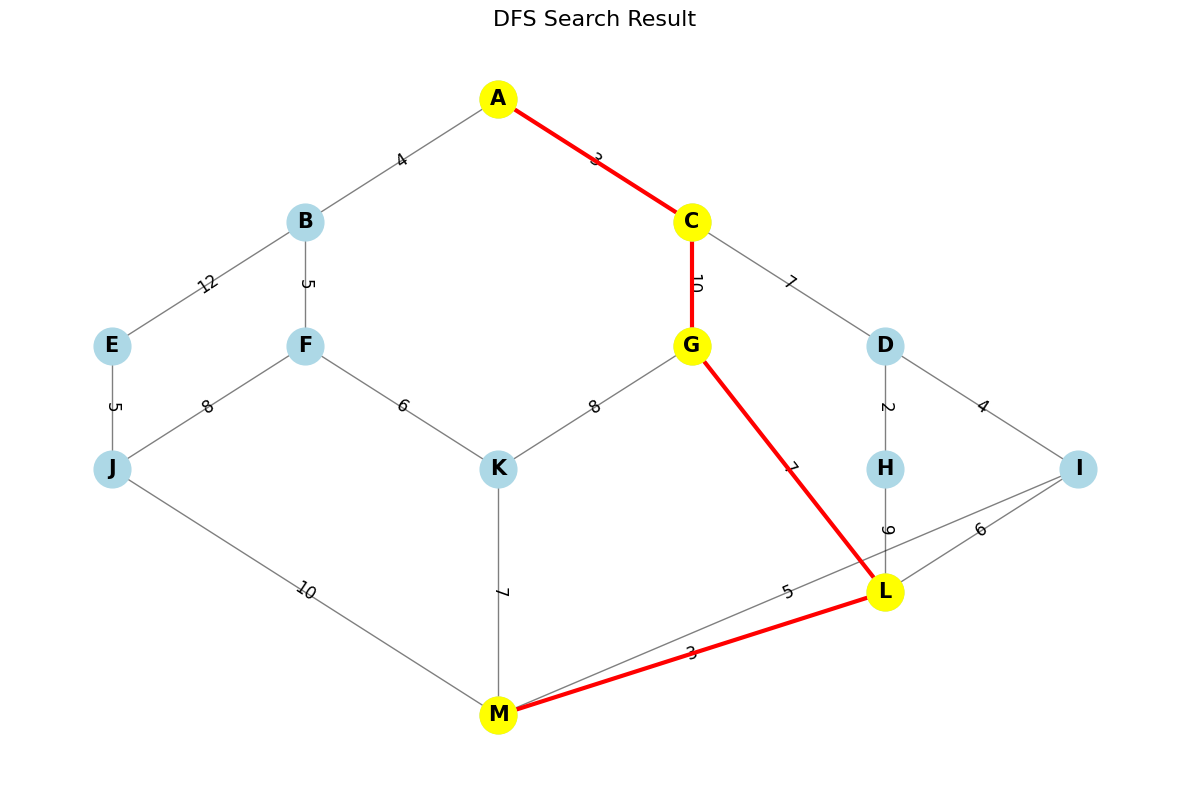

(['A', 'C', 'G', 'L', 'M'],
 ['A', 'C', 'G', 'L', 'M'],
 {'time': 4.1961669921875e-05,
  'space': 6,
  'path_cost': 23,
  'nodes_visited': 5})

In [4]:
run_graph_search_example(demo_graph, 'dfs', 'A', 'M')


Running ASTAR search from A to M...
✓ Path found! Length: 4, Cost: 19
Path: A -> C -> D -> I -> M
Nodes visited: 10
Max frontier size: 8
Time taken: 0.000165 seconds


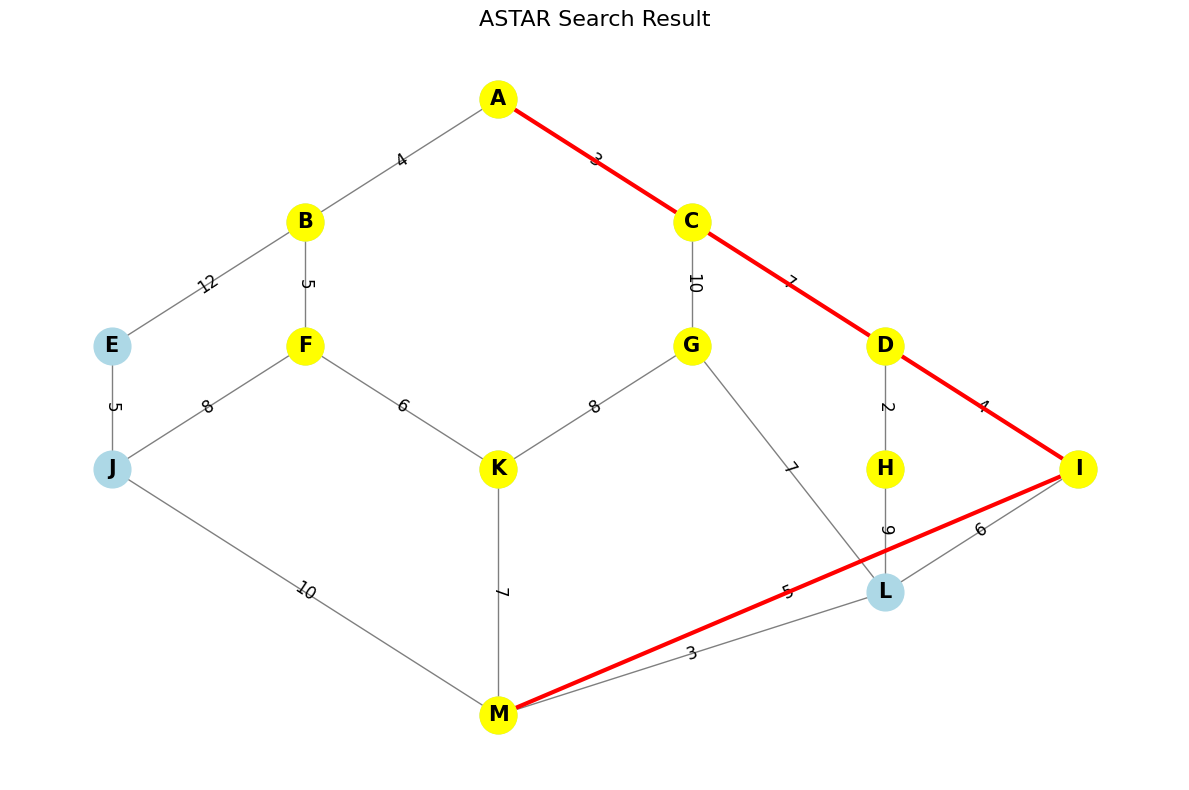

(['A', 'C', 'D', 'I', 'M'],
 ['A', 'C', 'B', 'F', 'D', 'H', 'G', 'K', 'I', 'M'],
 {'time': 0.0001647472381591797,
  'space': 8,
  'path_cost': 19,
  'nodes_visited': 10})

In [5]:
run_graph_search_example(demo_graph, 'astar', 'A', 'M')

## Step by Step Walk Through

In [6]:
create_graph_search_demo(demo_graph)

## Romania

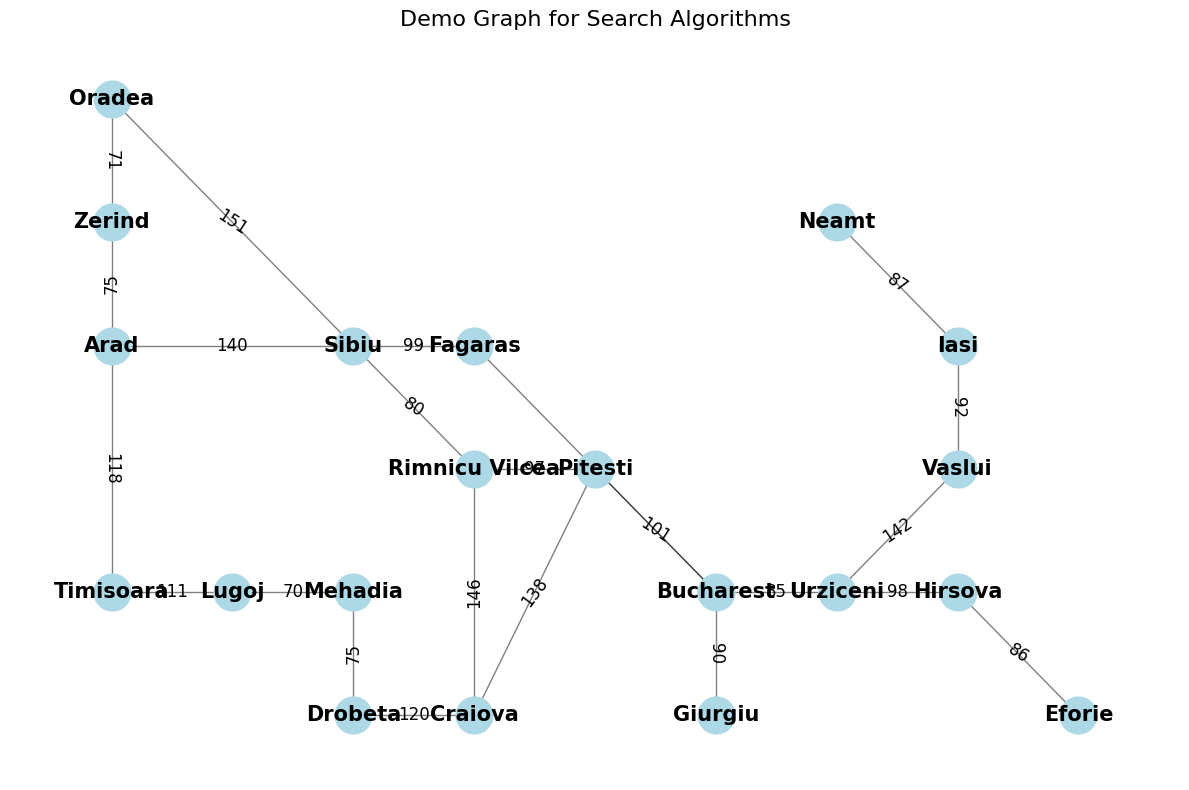

In [5]:
# Create a demo graph
romania_map = create_romania_map()

# Visualize the graph
fig = visualize_graph(romania_map, title="Demo Graph for Search Algorithms")
plt.show()

In [6]:
create_graph_search_demo(romania_map)

## Large Graph

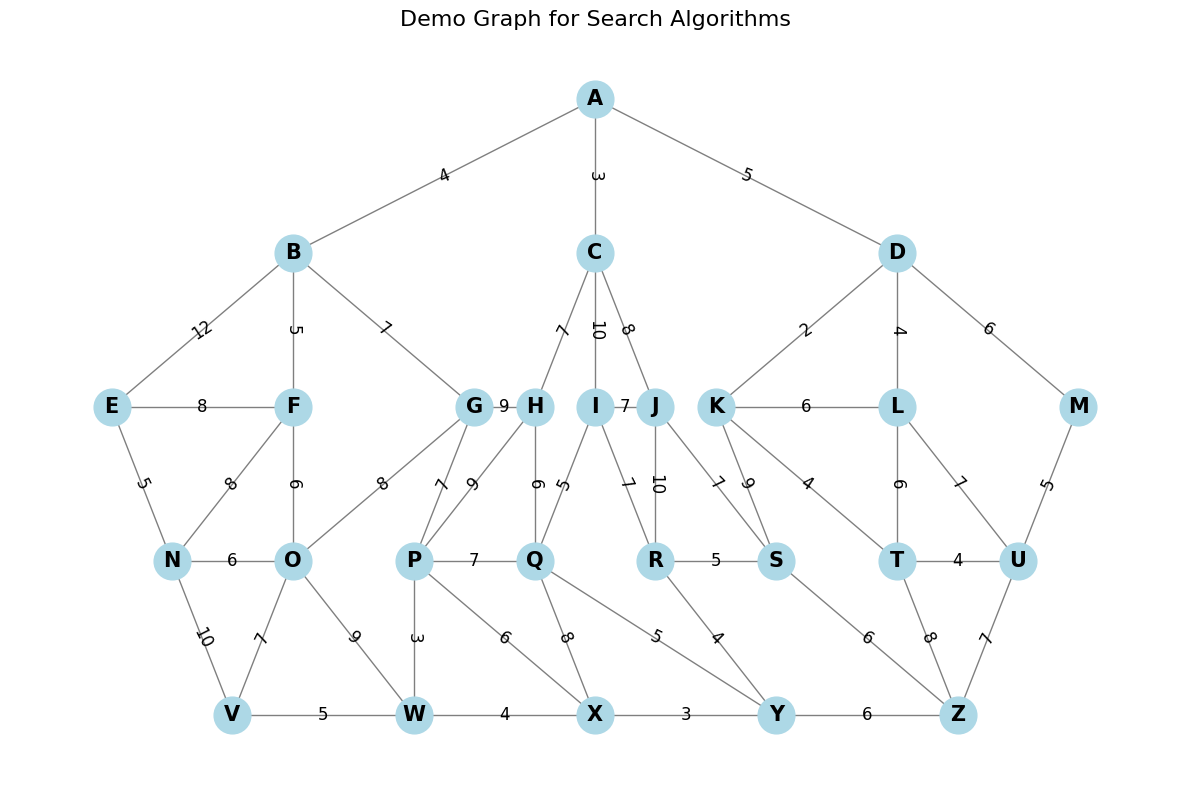

In [7]:
large_graph = create_large_demo_graph()

# Visualize the graph
fig = visualize_graph(large_graph, title="Demo Graph for Search Algorithms")
plt.show()

In [8]:
create_graph_search_demo(large_graph)

## Run Simulations

In [ ]:
# We'll use predefined start-goal pairs to ensure consistent comparisons
start_nodes = ['A', 'A', 'B', 'C', 'D', 'F', 'J', 'K', 'L']
goal_nodes = ['M', 'L', 'K', 'J', 'M', 'A', 'Z', 'W', 'Y', 'U']

# Define algorithms to include in the simulation
graph_algorithms = ['bfs', 'dfs', 'ucs', 'greedy', 'astar']

print("Running graph search simulations (this may take a moment)...")
# Run the simulations
sim_results_graph = run_graph_search_simulations(
    num_simulations=5,  # Reduced for demonstration
    algorithms=graph_algorithms,
    start_nodes=start_nodes,
    goal_nodes=goal_nodes
)

# Display the results
print("\nSimulation results (sample):")
sim_results_graph.head()

In [ ]:
# Calculate aggregate statistics
print("\nAggregate performance by algorithm:")
performance_summary = sim_results_graph.groupby('algorithm').agg({
    'time': ['mean', 'std'],
    'path_length': ['mean', 'std'],
    'path_cost': ['mean', 'std'],
    'nodes_visited': ['mean', 'std'],
    'max_frontier_size': ['mean', 'std'],
    'path_found': 'mean'
})

performance_summary

In [ ]:
# Calculate success rate
success_rate = sim_results_graph.groupby(
    'algorithm')['path_found'].mean() * 100
print("\nSuccess rate by algorithm (%):")
success_rate

In [ ]:
create_performance_charts(
    sim_results_graph, metric='time', title='Time Comparison')

In [ ]:
create_performance_charts(
    sim_results_graph, metric='max_frontier_size', title='Space Complexity Comparison')

In [ ]:
create_performance_charts(
    sim_results_graph, metric='path_length', title='Path Length Comparison')

In [ ]:
create_performance_charts(
    sim_results_graph, metric='path_cost', title='Path Cost Comparison')

In [ ]:
create_heatmap(
    sim_results_graph, value_col='time', title='Time by Algorithm and Path')

In [ ]:
create_heatmap(
    sim_results_graph, value_col='path_cost', title='Path Cost by Algorithm and Path')

In [ ]:
create_boxplot(sim_results_graph, value_col='time', title='Time Distribution')

In [ ]:
create_path_distribution_chart(sim_results_graph)

# Word Ladder

## 3-letter Game

In [3]:
WordLadderGame.generate_word_list_files()

game3 = WordLadderGame(word_length=3)

print(f"Game created with {len(game3.words)} 3-letter words")
print(f"Graph has {len(game3.graph.nodes)} nodes and {len(game3.graph.edges)} edges")

Word list file for 3-letter words already exists, skipping.
Word list file for 4-letter words already exists, skipping.
Word list file for 5-letter words already exists, skipping.
Loaded 1295 3-letter words from file
Game created with 1295 3-letter words
Graph has 1295 nodes and 12732 edges


In [7]:
start_word = "cat"
target_word = "dog"

BFS path (516 nodes visited): cat -> cag -> cog -> dog


In [10]:
# BFS search
path_bfs, _, metrics_bfs, _ = game3.find_path(
    start_word, target_word, algorithm="bfs")
print('='*30)
print(
    f"BFS path ({metrics_bfs['nodes_visited']} nodes visited): {' -> '.join(path_bfs)}")

# DFS search
path_dfs, _, metrics_dfs, _ = game3.find_path(
    start_word, target_word, algorithm="dfs")
print('='*30)
print(
    f"DFS path ({metrics_dfs['nodes_visited']} nodes visited): {' -> '.join(path_dfs)}")

# A* search with different heuristics
path_astar, _, metrics_astar, _ = game3.find_path(
    start_word, target_word, algorithm="astar", heuristic=hamming_distance
)
print('='*30)
print(
    f"A* with Hamming distance ({metrics_astar['nodes_visited']} nodes visited): {' -> '.join(path_astar)}")

path_letter, _, metrics_letter, _ = game3.find_path(
    start_word, target_word, algorithm="astar", heuristic=letter_set_difference
)
print('='*30)
print(
    f"A* with Letter set difference ({metrics_letter['nodes_visited']} nodes visited): {' -> '.join(path_letter)}")

path_vowel, _, metrics_vowel, _ = game3.find_path(
    start_word, target_word, algorithm="astar", heuristic=vowel_consonant_difference
)
print('='*30)
print(
    f"A* with Vowel-consonant (poor heuristic) ({metrics_vowel['nodes_visited']} nodes visited): {' -> '.join(path_vowel)}")

BFS path (516 nodes visited): cat -> cag -> cog -> dog
DFS path (139 nodes visited): cat -> yat -> yam -> yan -> ran -> rah -> sah -> saj -> sar -> say -> sly -> ply -> pry -> wry -> wro -> uro -> urf -> urd -> urs -> ure -> ule -> ale -> abe -> abu -> aru -> arx -> arm -> are -> art -> ast -> pst -> put -> pug -> jug -> tug -> tog -> vog -> bog -> bow -> now -> naw -> nag -> gag -> gad -> god -> cod -> con -> cow -> sow -> sol -> soe -> yoe -> yox -> fox -> for -> foo -> zoo -> moo -> mao -> mac -> bac -> bag -> baw -> yaw -> yad -> yid -> rid -> rip -> rib -> rub -> rud -> rod -> rad -> tad -> tar -> lar -> las -> gas -> gau -> gam -> gim -> tim -> dim -> jim -> aim -> rim -> rio -> gio -> gin -> pin -> pig -> pie -> vie -> voe -> foe -> fod -> pod -> pom -> poy -> loy -> lop -> mop -> mot -> moy -> joy -> jos -> kos -> koi -> poi -> poh -> poa -> pol -> col -> cal -> caw -> jaw -> jat -> jet -> ret -> get -> gem -> mem -> mer -> eer -> err -> era -> bra -> fra -> kra -> gra -> goa -


Visualizing the word graph with the found path:


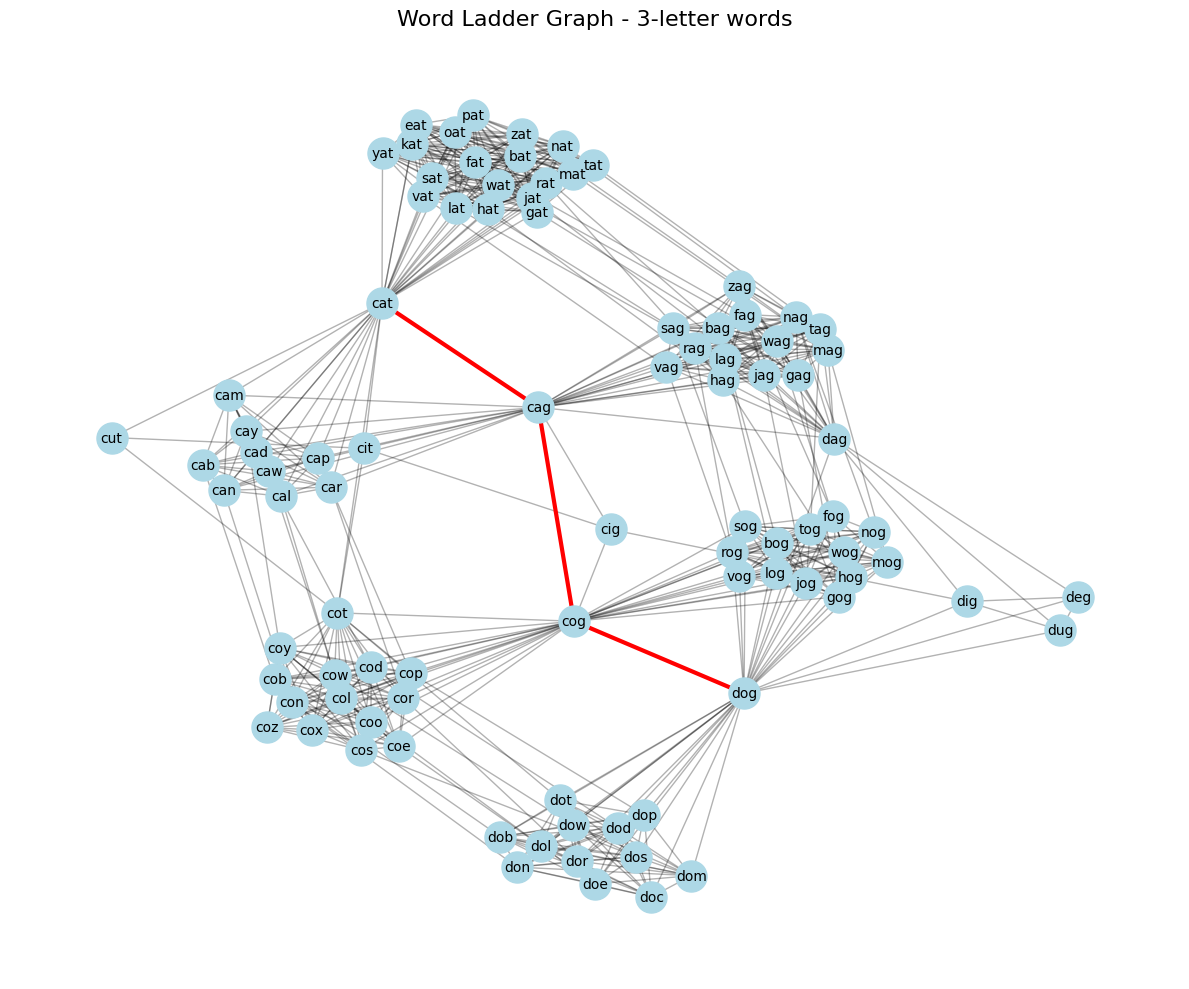

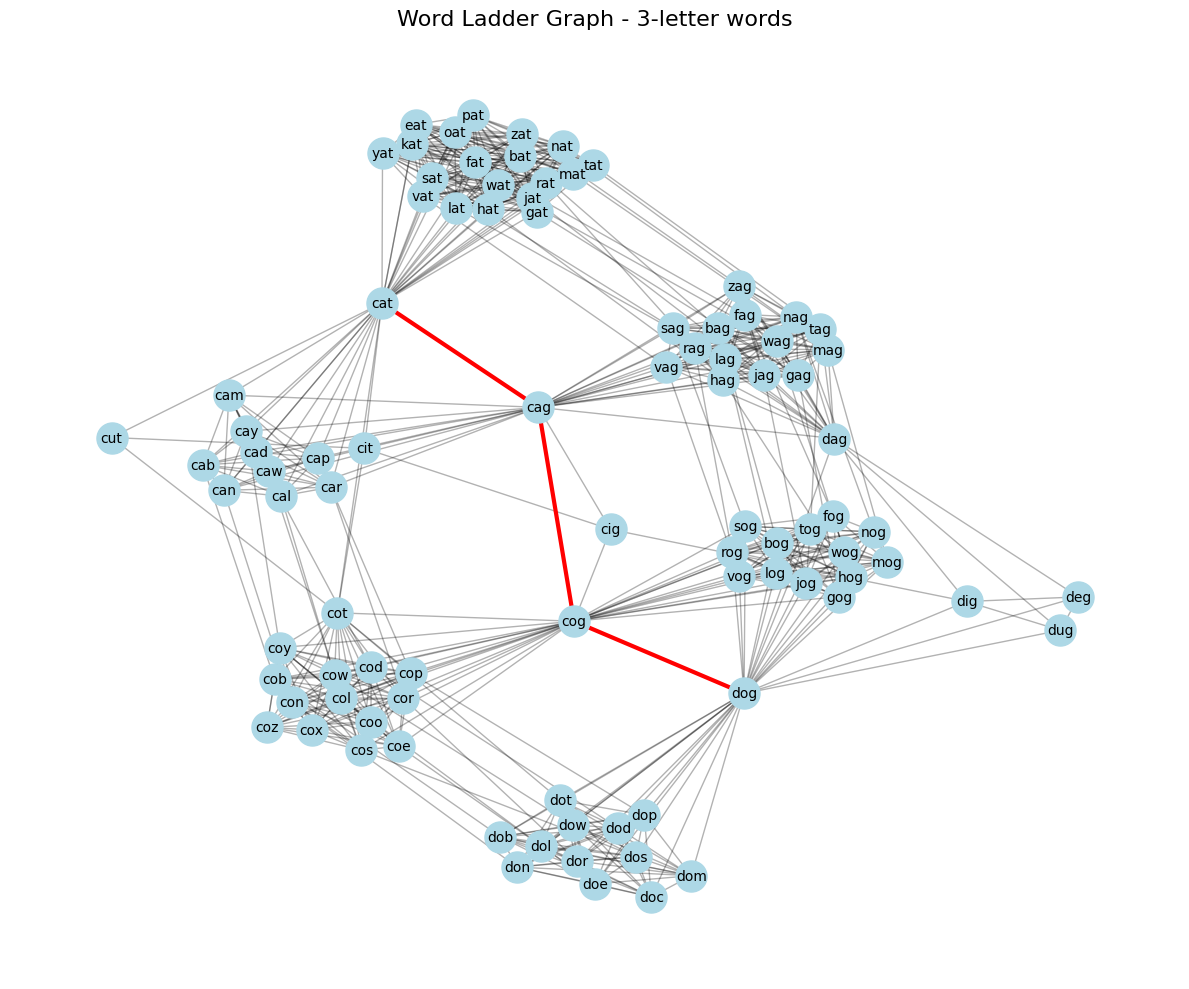

In [11]:
# Visualize the word graph with the found path
print("\nVisualizing the word graph with the found path:")
game3.visualize_word_graph(highlighted_path=path_astar)


Visualizing the word change progression:


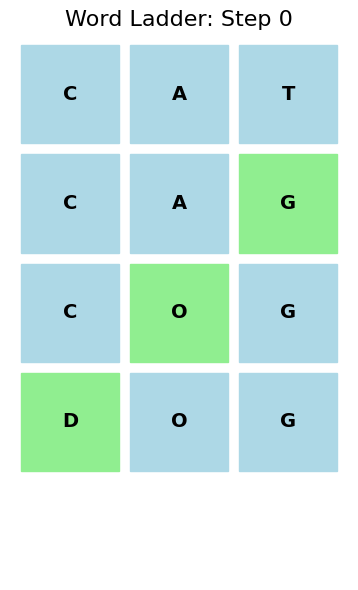

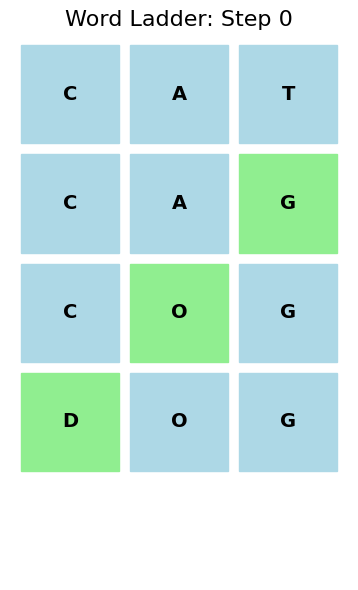

In [12]:
# Visualize the word change progression
print("\nVisualizing the word change progression:")
game3.visualize_word_change(start_word, path_astar)

## 4-letter Game

In [13]:
# Create a 4-letter word game
game4 = WordLadderGame(word_length=4)
print(f"\nCreated game with {len(game4.words)} 4-letter words")

Loaded 4996 4-letter words from file

Created game with 4996 4-letter words


Path from 'leek' to 'soup': leek -> leuk -> louk -> loup -> soup


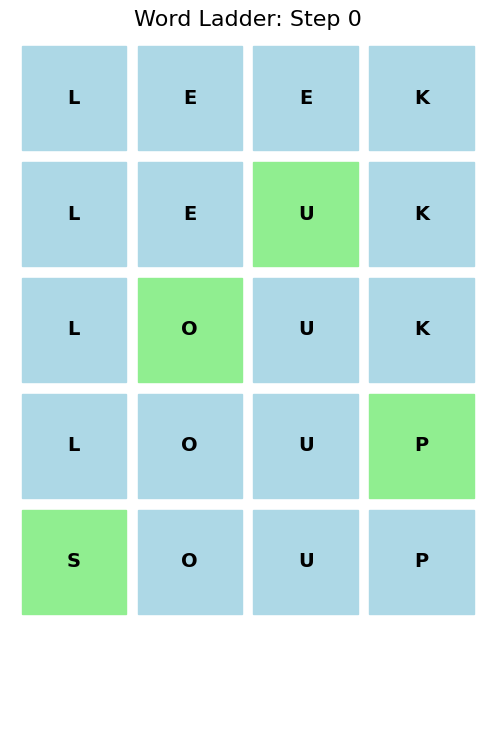

In [17]:
# Find a challenging 4-letter word path
words4 = list(game4.words)
if len(words4) >= 2:
    start_word4 = "leek"
    target_word4 = "soup"
    if start_word4 in game4.words and target_word4 in game4.words:
        path4, _, metrics4, _ = game4.find_path(
            start_word4, target_word4, algorithm="astar", heuristic=hamming_distance
        )
        print(
            f"Path from '{start_word4}' to '{target_word4}': {' -> '.join(path4 if path4 else ['No path found'])}")
        if path4:
            game4.visualize_word_change(start_word4, path4)


Visualizing the word graph with the found path:


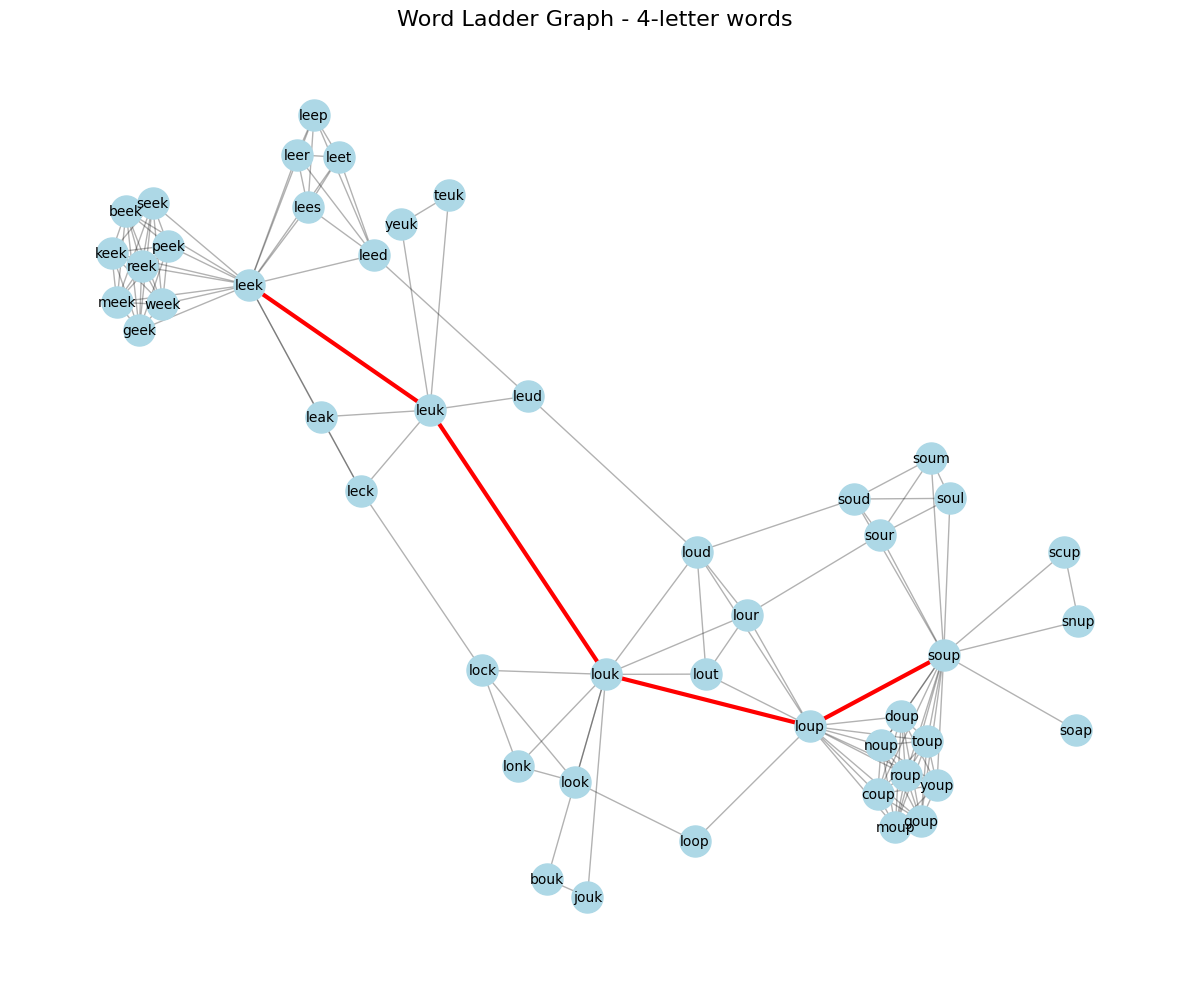

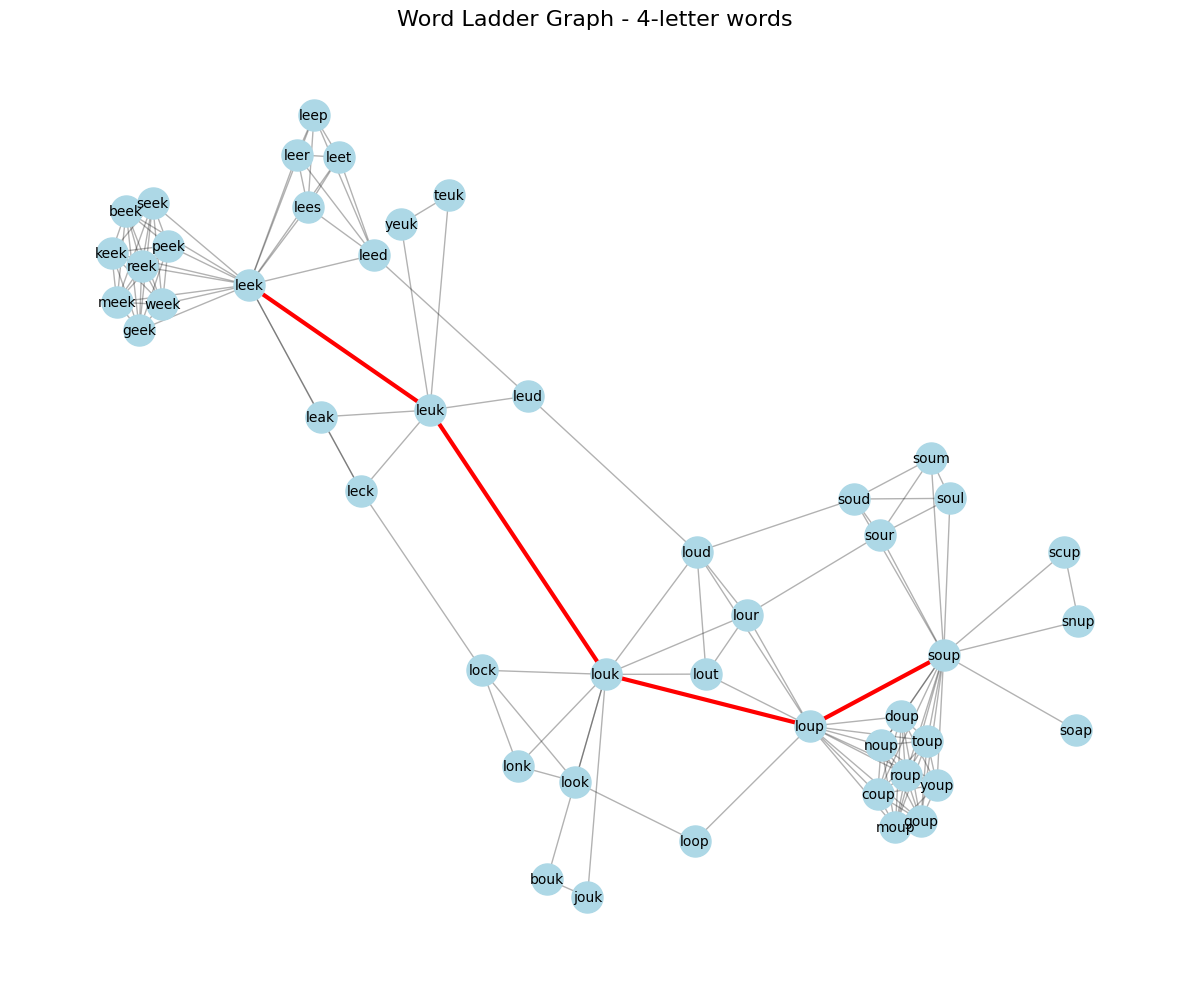

In [18]:
# Visualize the word graph with the found path
print("\nVisualizing the word graph with the found path:")
game4.visualize_word_graph(highlighted_path=path4)

## 5-letter Game

Loaded 9972 5-letter words from file

Created game with 9972 5-letter words
Path from 'world' to 'peace': world -> would -> mould -> moule -> mouse -> douse -> douce -> pouce -> ponce -> pence -> peace


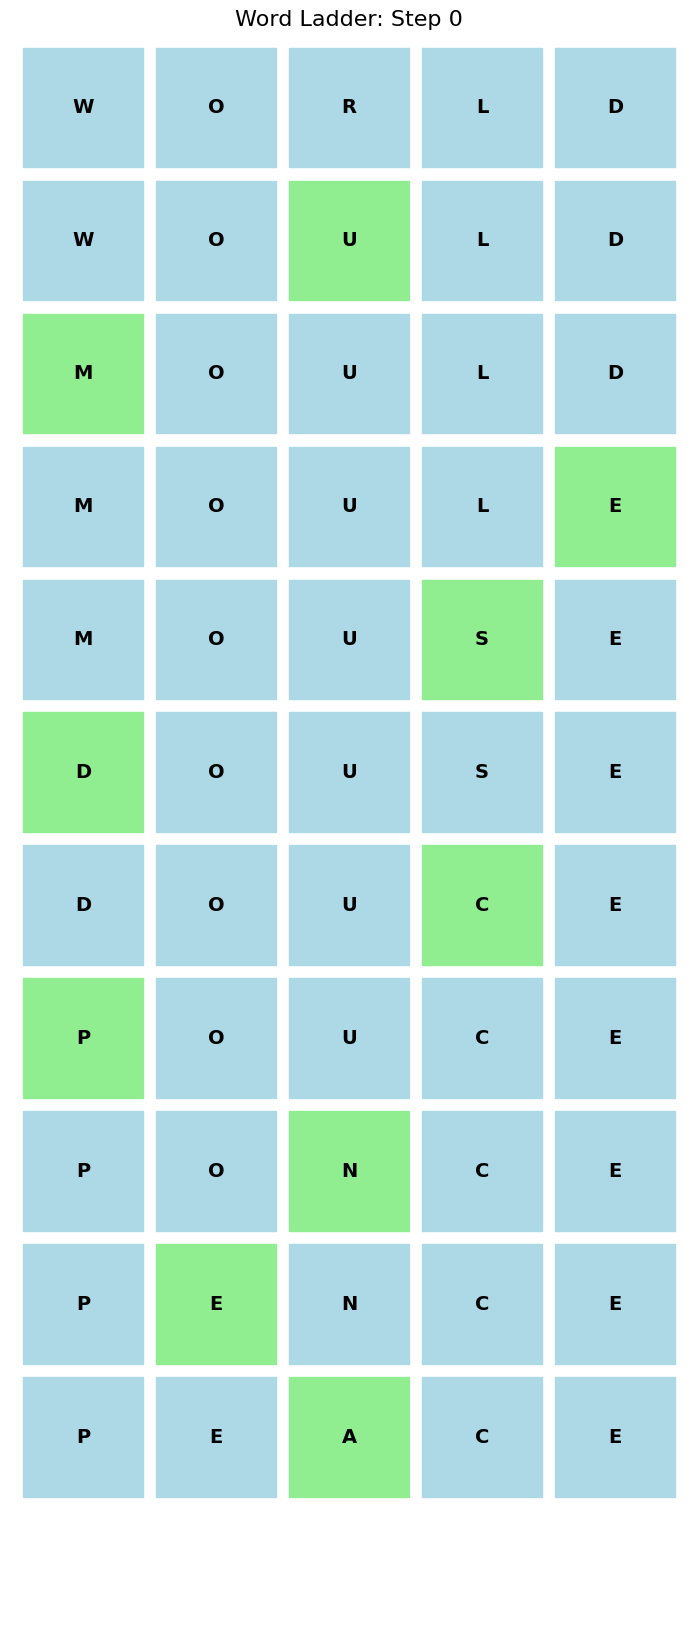

In [19]:
# Create a 5-letter word game
game5 = WordLadderGame(word_length=5)
print(f"\nCreated game with {len(game5.words)} 5-letter words")

# Find a challenging 5-letter word path
words5 = list(game5.words)
if len(words5) >= 2:
    start_word5 = "world"
    target_word5 = "peace"
    if start_word5 in game5.words and target_word5 in game5.words:
        path5, _, metrics5, _ = game5.find_path(
            start_word5, target_word5, algorithm="astar", heuristic=hamming_distance
        )
        print(
            f"Path from '{start_word5}' to '{target_word5}': {' -> '.join(path5 if path5 else ['No path found'])}")
        if path5:
            game5.visualize_word_change(start_word5, path5)

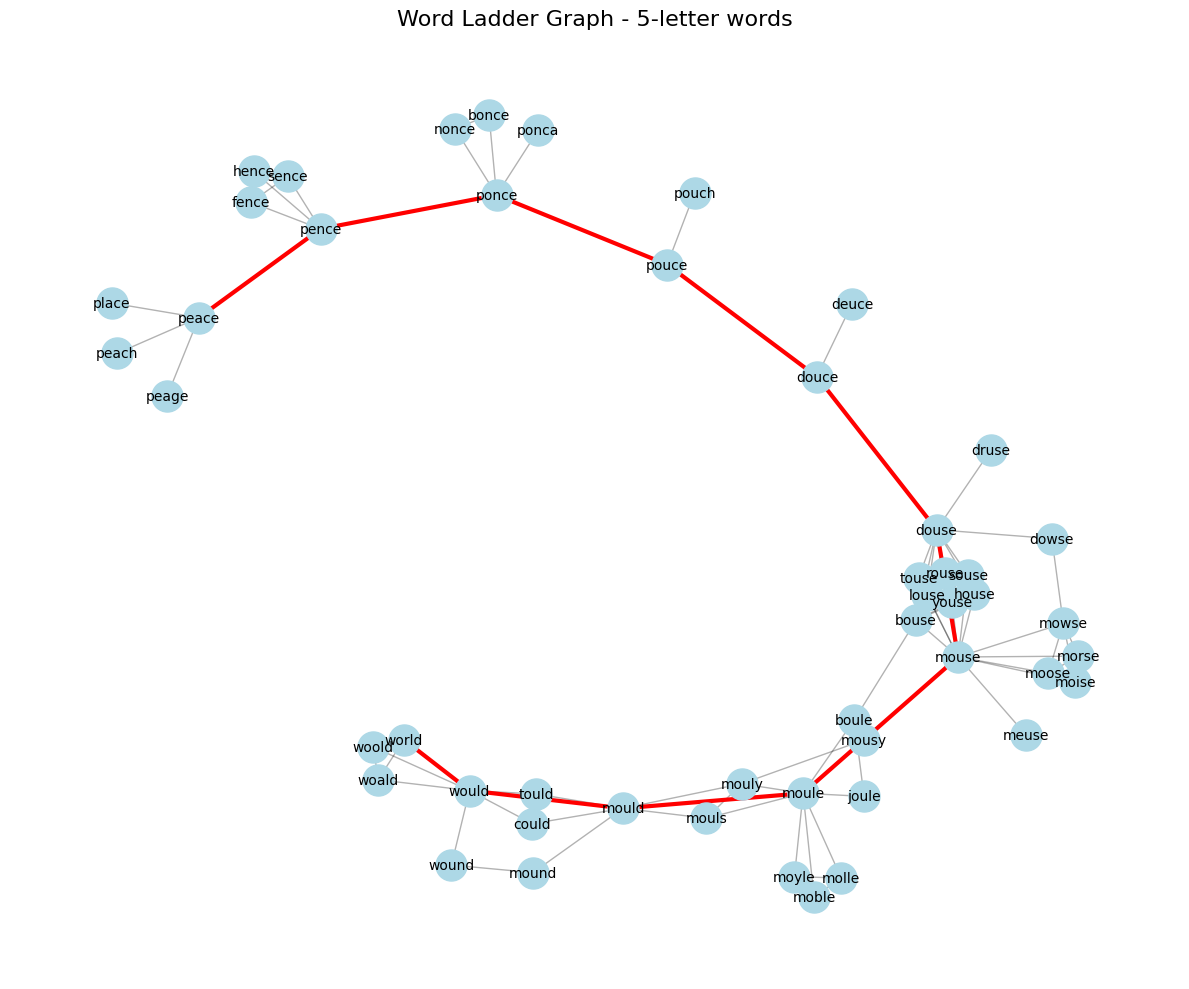

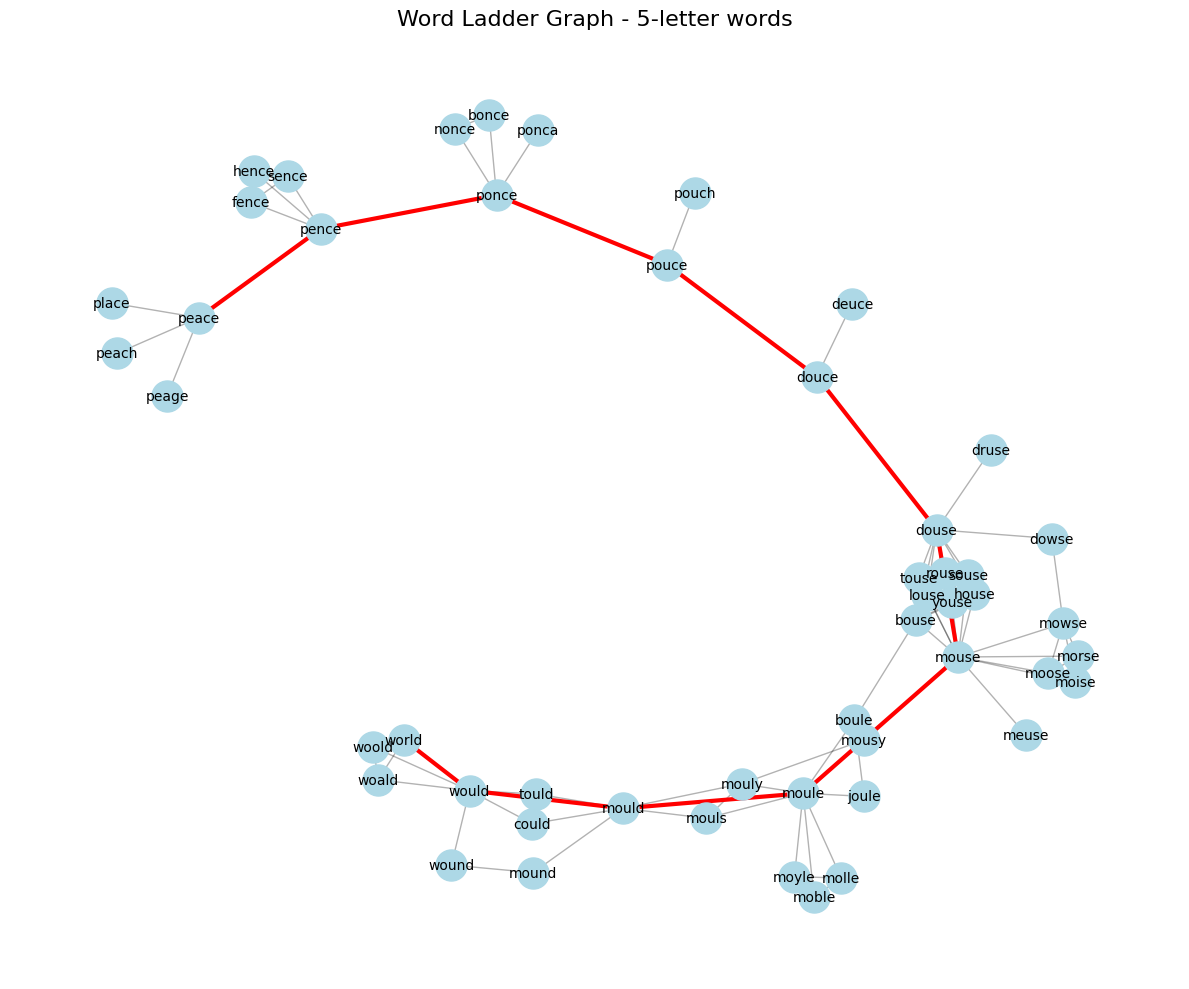

In [20]:
game5.visualize_word_graph(highlighted_path=path5)

## Interactive Demo

In [2]:
# For interactive demo, let's safely select words that definitely exist in the game
game3 = WordLadderGame(word_length=3)

safe_words = list(game3.words)
start_safe = safe_words[0]
target_safe = safe_words[-1]

start_safe = 'cat'
target_safe = 'dog'

# Create an interactive demo
print("\nCreating an interactive demo:")
create_word_ladder_demo(game3, start_word=start_safe, target_word=target_safe)

Loaded 1295 3-letter words from file

Creating an interactive demo:


## Run Simulations

In [2]:
# Run a full analysis with all charts
results = analyze_word_ladder_performance(
    num_simulations=3,  # Keep it small for quick testing
    word_lengths=[3],   # Test only 3-letter words for faster execution
    algorithms=['bfs', 'astar']  # Test basic algorithms
)

Running word ladder simulations...
Word list file for 3-letter words already exists, skipping.
Word list file for 4-letter words already exists, skipping.
Word list file for 5-letter words already exists, skipping.
Loaded 1295 3-letter words from file
Created game with 1295 3-letter words
Running simulation 1/4 for 3-letter words: cat -> dog
Running simulation 2/4 for 3-letter words: hit -> cog
Running simulation 3/4 for 3-letter words: hot -> dog
Running simulation 4/4 for 3-letter words: bat -> rat
Completed 16 algorithm runs

Generating performance charts...


alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)


Generating heatmaps by word length...


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)


Generating boxplots...


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)


Generating success rate chart...


alt.Chart(...)


Comparing heuristics for informed search...


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [4]:
# Run custom simulations
custom_results = run_word_ladder_simulations(
    num_simulations=2,
    word_lengths=[3, 4],
    algorithms=['bfs', 'dfs', 'astar']
)

Word list file for 3-letter words already exists, skipping.
Word list file for 4-letter words already exists, skipping.
Word list file for 5-letter words already exists, skipping.
Loaded 1295 3-letter words from file
Created game with 1295 3-letter words
Running simulation 1/4 for 3-letter words: cat -> dog
Running simulation 2/4 for 3-letter words: hit -> cog
Running simulation 3/4 for 3-letter words: hot -> dog
Running simulation 4/4 for 3-letter words: bat -> rat
Loaded 4996 4-letter words from file
Created game with 4996 4-letter words
Running simulation 1/4 for 4-letter words: play -> work
Running simulation 2/4 for 4-letter words: cold -> warm
Running simulation 3/4 for 4-letter words: word -> talk
Running simulation 4/4 for 4-letter words: make -> take


In [6]:
create_performance_charts(custom_results, metric='time')

alt.LayerChart(...)

In [7]:
create_boxplot(custom_results, value_col='nodes_visited')

alt.Chart(...)

# N-Puzzle

## Create Puzzle

N-PUZZLE DEMONSTRATION
8-Puzzle (Random Solvable State):


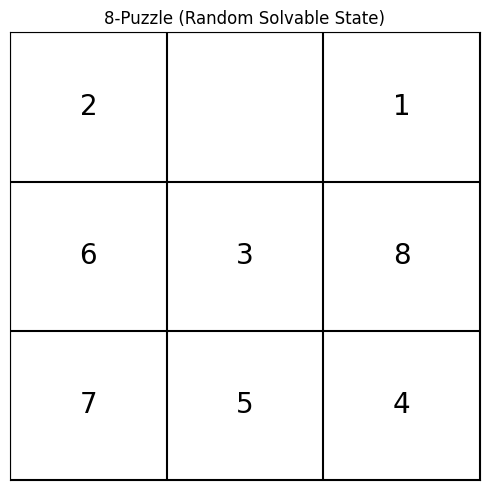

In [24]:
print("N-PUZZLE DEMONSTRATION")
print("=====================")

# Create example puzzles
puzzle_8 = NPuzzle(size=3)
puzzle_15 = NPuzzle(size=4)

# Visualize the puzzles
print("8-Puzzle (Random Solvable State):")
fig1 = puzzle_8.visualize(title="8-Puzzle (Random Solvable State)")
plt.show()


8-Puzzle (Goal State):


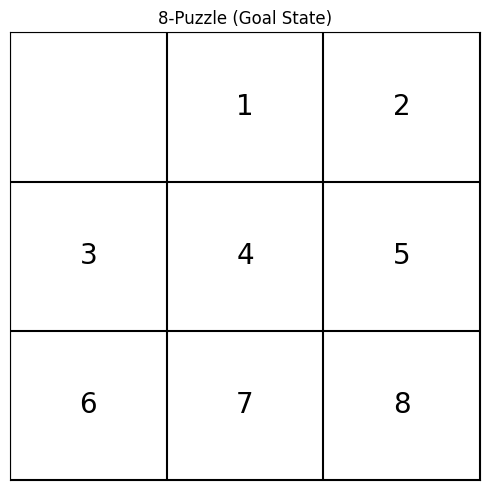

In [25]:
print("\n8-Puzzle (Goal State):")
fig2 = puzzle_8.visualize(puzzle_8.goal_state, title="8-Puzzle (Goal State)")
plt.show()


15-Puzzle (Random Solvable State):


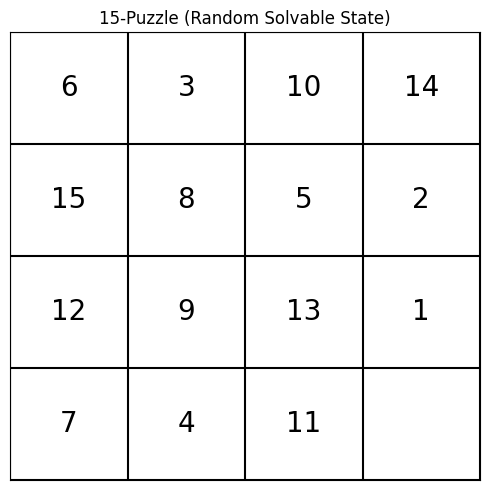

In [26]:
print("\n15-Puzzle (Random Solvable State):")
fig3 = puzzle_15.visualize(title="15-Puzzle (Random Solvable State)")
plt.show()


15-Puzzle (Goal State):


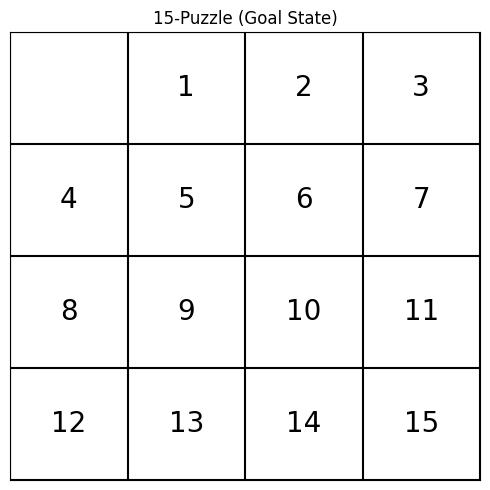

In [27]:
print("\n15-Puzzle (Goal State):")
fig4 = puzzle_15.visualize(puzzle_15.goal_state, title="15-Puzzle (Goal State)")
plt.show()

## Demo Puzzle


Creating a simpler puzzle for demonstration...


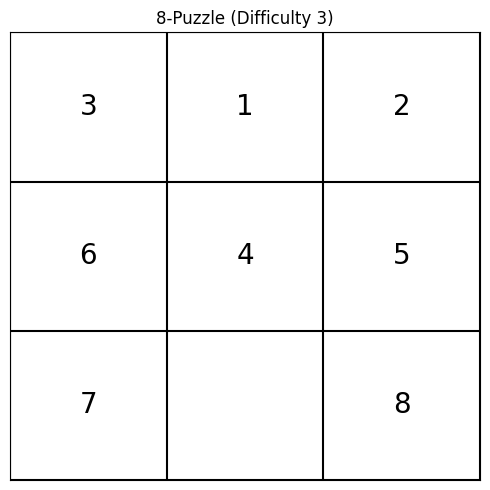

In [28]:
# Create a simpler puzzle for demonstration
print("\nCreating a simpler puzzle for demonstration...")
demo_puzzle = create_specific_puzzle(size=3, difficulty=3)
fig5 = demo_puzzle.visualize(title="8-Puzzle (Difficulty 3)")
plt.show()

In [29]:
# Run A* search on the puzzle
print("\nRunning A* search with Manhattan distance heuristic...")
path, actions, metrics, states = n_puzzle_search(
    demo_puzzle, 'astar', 'manhattan', max_iterations=1000
)


Running A* search with Manhattan distance heuristic...


✓ Solution found in 3 moves!
Actions: left, up, up
Time taken: 0.000059 seconds
Max frontier size: 4
States visited: 7
Iterations: 4

Final State (Goal):


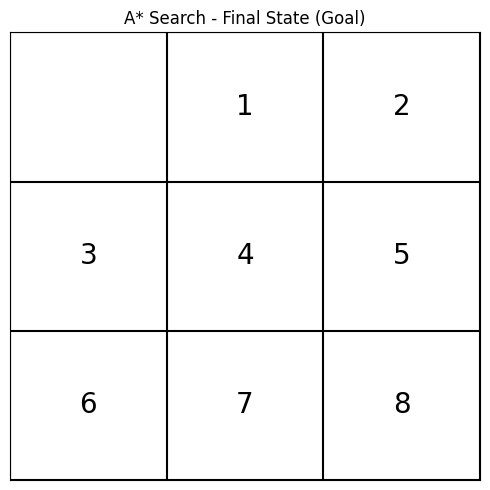

In [30]:
print(f"✓ Solution found in {len(path) - 1} moves!")
print(f"Actions: {', '.join(actions)}")
print(f"Time taken: {metrics['time']:.6f} seconds")
print(f"Max frontier size: {metrics['space']}")
print(f"States visited: {metrics['states_visited']}")
print(f"Iterations: {metrics['iterations']}")

# Show the final state
print("\nFinal State (Goal):")
fig6 = demo_puzzle.visualize(path[-1], title="A* Search - Final State (Goal)")
plt.show()

## Interactive

In [32]:
create_n_puzzle_demo(
    size=3,
    difficulty=5
)

## Simulations

In [33]:
# Run N-puzzle simulations
print("\nN-PUZZLE SIMULATIONS")
print("===================")

# Define parameters for the simulations
puzzle_algorithms = ['bfs', 'ucs', 'greedy', 'astar']  # Exclude DFS as it's often impractical for N-puzzle
puzzle_sizes = [3]  # Only use 8-puzzle (3x3) for efficiency
difficulties = [3, 5, 20, 100]  # Different difficulty levels

print("Running N-puzzle simulations (this may take a while)...")
# Run the simulations with reduced parameters for demonstration
sim_results_puzzle = run_n_puzzle_simulations(
    num_simulations=2,  # Reduced for demonstration
    algorithms=puzzle_algorithms,
    puzzle_sizes=puzzle_sizes,
    difficulties=difficulties
)

# Display the results
print("\nSimulation results (sample):")
sim_results_puzzle.head()


N-PUZZLE SIMULATIONS
Running N-puzzle simulations (this may take a while)...

Simulation results (sample):


,simulation,algorithm,puzzle_size,difficulty,path_found,path_length,path_cost,states_visited,max_frontier_size,iterations,time
0,0,bfs,3,3,True,3.0,3.0,29,12,18,0.000062
1,0,ucs,3,3,True,3.0,3.0,29,12,18,0.000062
2,0,greedy_manhattan,3,3,True,3.0,3.0,7,4,4,0.000035
3,0,greedy_misplaced,3,3,True,3.0,3.0,7,4,4,0.000021
4,0,greedy_linear_conflict,3,3,True,3.0,3.0,7,4,4,0.000084


In [34]:
# Calculate aggregate statistics
print("\nAggregate performance by algorithm:")
puzzle_summary = sim_results_puzzle.groupby('algorithm').agg({
    'time': ['mean', 'std'],
    'path_length': ['mean', 'std'],
    'path_cost': ['mean', 'std'],
    'states_visited': ['mean', 'std'],
    'max_frontier_size': ['mean', 'std'],
    'path_found': 'mean'
})

puzzle_summary


Aggregate performance by algorithm:


time           path_length            path_cost  \
                            mean       std        mean        std      mean   
algorithm                                                                     
astar_linear_conflict   0.001503  0.002060       11.00   7.964206     11.00   
astar_manhattan         0.001143  0.001634       11.00   7.964206     11.00   
astar_misplaced         0.007220  0.010140       11.00   7.964206     11.00   
bfs                     0.012338  0.015656         inf        NaN       inf   
greedy_linear_conflict  0.000559  0.000668       18.75  20.154758     18.75   
greedy_manhattan        0.000652  0.000791       30.50  36.288526     30.50   
greedy_misplaced        0.001480  0.003278       32.25  43.397663     32.25   
ucs                     0.021145  0.032165         inf        NaN       inf   

                                  states_visited               \
                              std           mean          std   
algorithm                                                       
astar_linear_conflict    7.964206        207.625   283.301423   
astar_manhattan          7.964206        322.625   454.590534   
astar_misplaced          7.964206       1900.625  2598.415338   
bfs                           NaN       3247.875  3813.728338   
greedy_linear_conflict  20.154758         71.875    91.868598   
greedy_manhattan        36.288526        194.375   241.237250   
greedy_misplaced        43.397663        449.125   856.829444   
ucs                           NaN       3217.250  3834.604049   

                       max_frontier_size              path_found  
                                    mean          std       mean  
algorithm                                                         
astar_linear_conflict             82.500   109.169593        1.0  
astar_manhattan                  123.750   171.492399        1.0  
astar_misplaced                  713.375   970.035778        1.0  
bfs                             1156.875  1347.012614        1.0  
greedy_linear_conflict            31.000    36.000000        1.0  
greedy_manhattan                  81.500    98.860652        1.0  
greedy_misplaced                 176.875   328.163477        1.0  
ucs                             1155.875  1359.755381        1.0

In [35]:
# Calculate success rate
puzzle_success_rate = sim_results_puzzle.groupby('algorithm')['path_found'].mean() * 100
print("\nSuccess rate by algorithm (%):")
puzzle_success_rate


Success rate by algorithm (%):


algorithm
astar_linear_conflict     100.0
astar_manhattan           100.0
astar_misplaced           100.0
bfs                       100.0
greedy_linear_conflict    100.0
greedy_manhattan          100.0
greedy_misplaced          100.0
ucs                       100.0
Name: path_found, dtype: float64

In [36]:
create_performance_charts(
    sim_results_puzzle, metric='time', title='Time Comparison for N-Puzzle')

alt.LayerChart(...)

In [37]:
create_performance_charts(sim_results_puzzle, metric='max_frontier_size',
                          title='Space Complexity Comparison for N-Puzzle')

alt.LayerChart(...)

In [38]:
create_performance_charts(sim_results_puzzle, metric='path_length',
                          title='Path Length Comparison for N-Puzzle')

alt.LayerChart(...)

In [39]:
create_heatmap(sim_results_puzzle, value_col='time',
               title='Time vs Difficulty by Algorithm')

alt.Chart(...)

In [40]:
sim_results_puzzle.query('algorithm=="bfs"')

,simulation,algorithm,puzzle_size,difficulty,path_found,path_length,path_cost,states_visited,max_frontier_size,iterations,time
0,0,bfs,3,3,True,3.0,3.0,29,12,18,0.000062
8,0,bfs,3,5,True,5.0,5.0,69,30,40,0.000099
16,0,bfs,3,20,True,inf,inf,7803,2803,5000,0.035867
24,0,bfs,3,100,True,12.0,12.0,2538,939,1601,0.005672
32,1,bfs,3,3,True,3.0,3.0,31,14,18,0.000049
40,1,bfs,3,5,True,5.0,5.0,95,41,55,0.000127
48,1,bfs,3,20,True,inf,inf,7709,2708,5000,0.028771
56,1,bfs,3,100,True,inf,inf,7709,2708,5000,0.028054
